In [2]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import log, factorial
from scipy.optimize import minimize

In [16]:
mnist_train = pd.read_csv('/Users/giovannimaya/Downloads/MNIST_train.csv')

mnist_train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,response
0,50463,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,35844,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,53660,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,4047,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36869,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


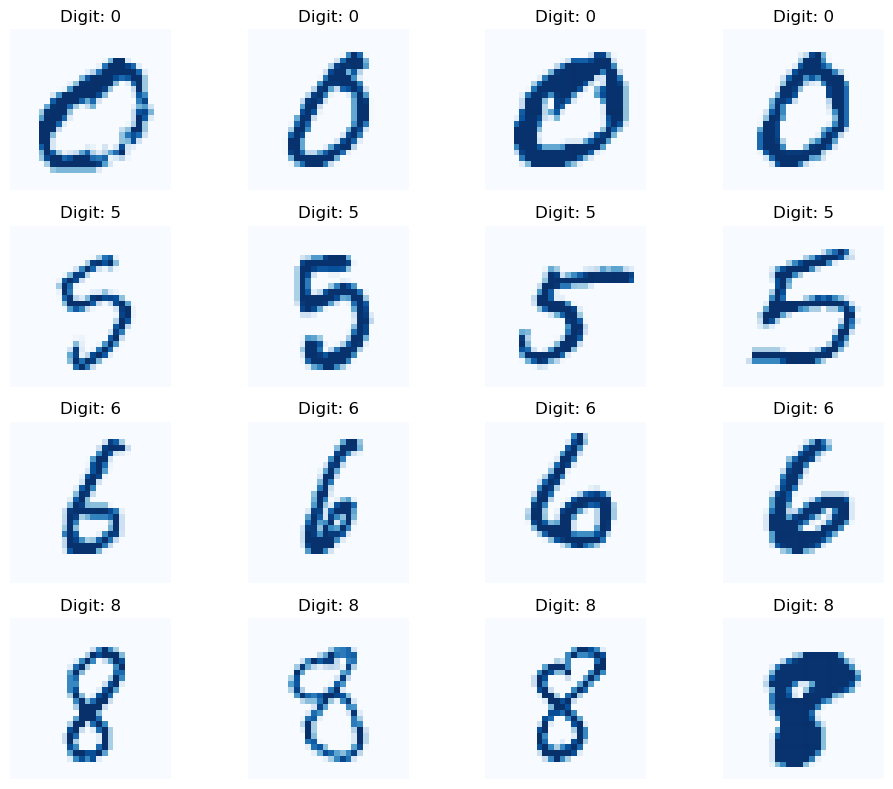

In [33]:
digits = [0, 5, 6, 8]
examples_per_digit = 4
indices = {}
for digit in digits:
    indices[digit] = mnist_train[mnist_train['response'] == digit].index[:examples_per_digit]
fig, axes = plt.subplots(nrows=len(digits), ncols=examples_per_digit, figsize=(10, 8))

for row, digit in enumerate(digits):
    for col in range(examples_per_digit):
        idx = indices[digit][col]
        image = mnist_train.loc[idx, mnist_train.columns[1:-1]].values.reshape(28, 28)
        axes[row, col].imshow(image, cmap='Blues')
        axes[row, col].set_title(f'Digit: {digit}')
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()


In [59]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = mnist_train.drop(['Unnamed: 0', 'response'], axis=1)
y = mnist_train['response']


mnist_test = pd.read_csv('/Users/giovannimaya/Downloads/MNIST_test.csv')
Y_test = mnist_test['response']
X_test = mnist_test.drop(['Unnamed: 0', 'response'], axis=1)

model_A = RandomForestClassifier(n_estimators=5, random_state=419)
model_A.fit(X, y)
y_pred_A = model_A.predict(X_test)
accuracy_A = accuracy_score(Y_test, y_pred_A)

model_B = RandomForestClassifier(n_estimators=5, max_depth=4, random_state=419)
model_B.fit(X, y)
y_pred_B = model_B.predict(X_test)
accuracy_B = accuracy_score(Y_test, y_pred_B)

model_C = RandomForestClassifier(n_estimators=5, ccp_alpha=0.0001, random_state=419)
model_C.fit(X, y)
y_pred_C = model_C.predict(X_test)
accuracy_C = accuracy_score(Y_test, y_pred_C)

model_D = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=419)
model_D.fit(X, y)
y_pred_D = model_D.predict(X_test)
accuracy_D = accuracy_score(Y_test, y_pred_D)

model_E = RandomForestClassifier(n_estimators=50, ccp_alpha=0.0001, random_state=419)
model_E.fit(X, y)
y_pred_E = model_E.predict(X_test)
accuracy_E = accuracy_score(Y_test, y_pred_E)

model_F = GradientBoostingClassifier(n_estimators=50, random_state=419)
model_F.fit(X, y)
y_pred_F = model_F.predict(X_test)
accuracy_F = accuracy_score(Y_test, y_pred_F)

accuracy_A, accuracy_B, accuracy_C, accuracy_D, accuracy_E, accuracy_F


(0.945, 0.895, 0.945, 0.9625, 0.97375, 0.9675)

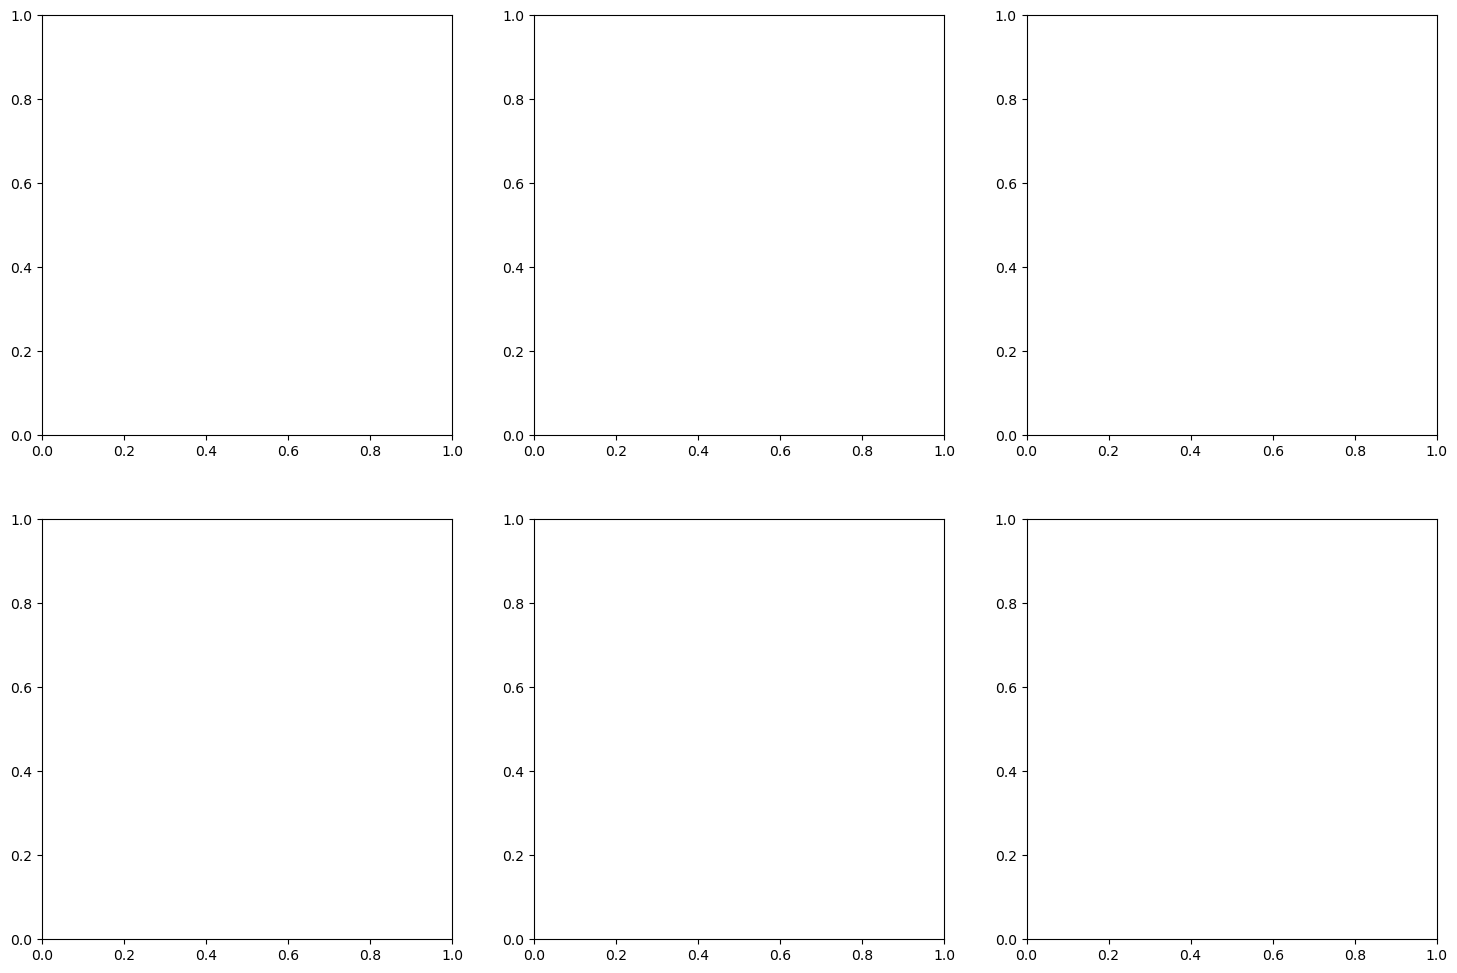

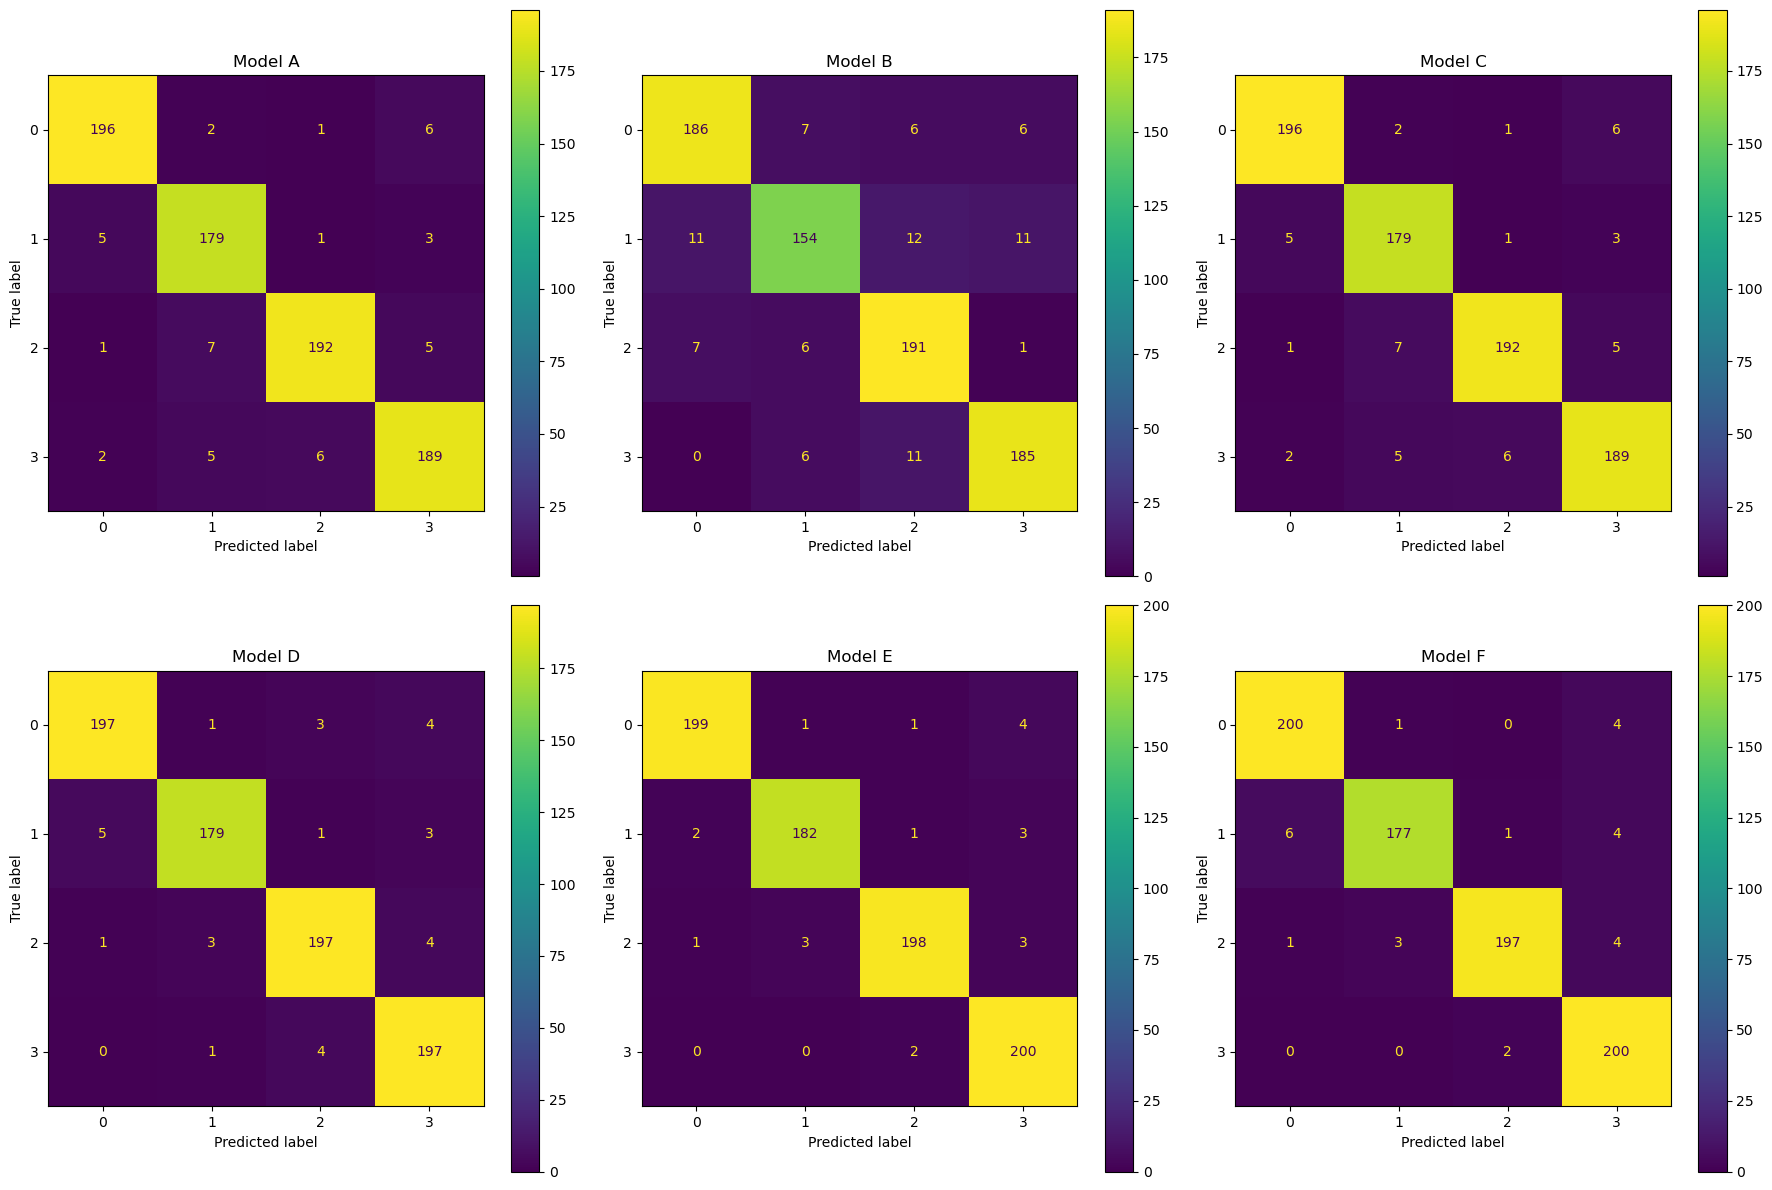

In [61]:
# Prepare the new test set for model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
mnist_test_data = pd.read_csv('/Users/giovannimaya/Downloads/MNIST_test.csv')

X_test_new = mnist_test_data.drop(['Unnamed: 0', 'response'], axis=1)
y_test_new = mnist_test_data['response']

# Predict with each model on the new test set
y_pred_A_new = model_A.predict(X_test_new)
y_pred_B_new = model_B.predict(X_test_new)
y_pred_C_new = model_C.predict(X_test_new)
y_pred_D_new = model_D.predict(X_test_new)
y_pred_E_new = model_E.predict(X_test_new)
y_pred_F_new = model_F.predict(X_test_new)

# Compute confusion matrices for each random forest model on the new test set
cm_A_new = confusion_matrix(y_test_new, y_pred_A_new)
cm_B_new = confusion_matrix(y_test_new, y_pred_B_new)
cm_C_new = confusion_matrix(y_test_new, y_pred_C_new)
cm_D_new = confusion_matrix(y_test_new, y_pred_D_new)
cm_E_new = confusion_matrix(y_test_new, y_pred_E_new)
cm_F_new = confusion_matrix(y_test_new, y_pred_F_new)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Titles for the models
model_titles_new = [
    'Model A',
    'Model B',
    'Model C',
    'Model D',
    'Model E',
    'Model F'
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # Create a 2x3 grid of subplots

conf_matrices_new = [cm_A_new, cm_B_new, cm_C_new, cm_D_new, cm_E_new, cm_F_new]

for ax, cm, title in zip(axes.flat, conf_matrices_new + [None], model_titles_new):
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)
    ax.set_title(title)
plt.tight_layout()  # Adjust subplots to minimize overlap
plt.show()  # Display the plot

[[196   2   1   6]
 [  5 179   1   3]
 [  1   7 192   5]
 [  2   5   6 189]]
[[186   7   6   6]
 [ 11 154  12  11]
 [  7   6 191   1]
 [  0   6  11 185]]
[[196   2   1   6]
 [  5 179   1   3]
 [  1   7 192   5]
 [  2   5   6 189]]
[[197   1   3   4]
 [  5 179   1   3]
 [  1   3 197   4]
 [  0   1   4 197]]
[[199   1   1   4]
 [  2 182   1   3]
 [  1   3 198   3]
 [  0   0   2 200]]
[[200   1   0   4]
 [  6 177   1   4]
 [  1   3 197   4]
 [  0   0   2 200]]


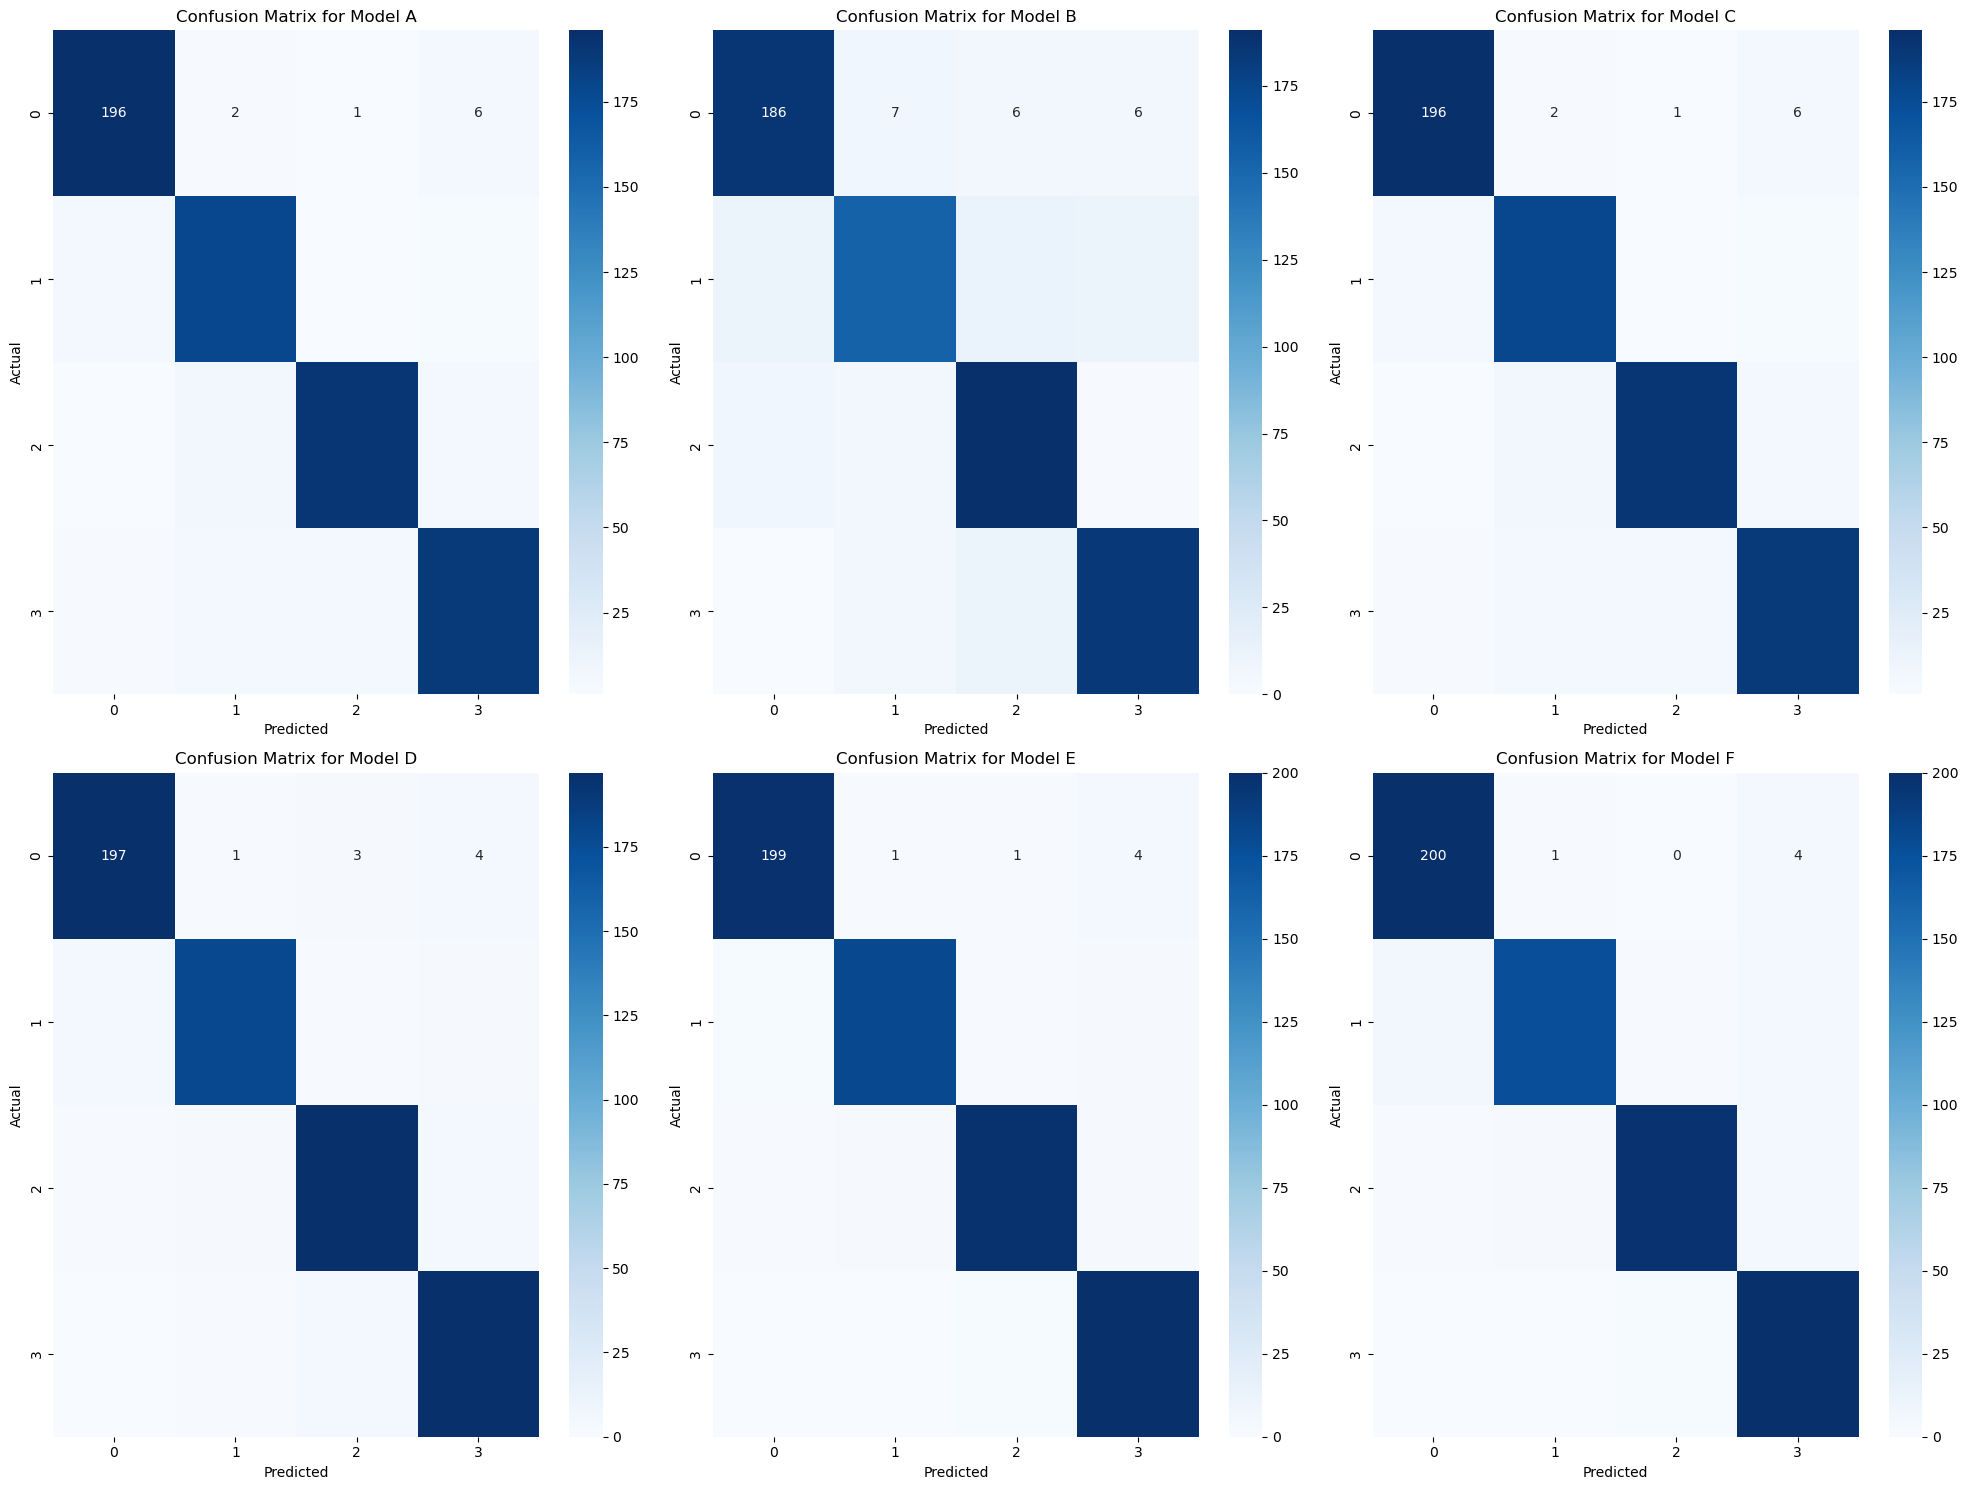

In [63]:
train_data = pd.read_csv('/Users/giovannimaya/Downloads/MNIST_train.csv')
test_data = pd.read_csv('/Users/giovannimaya/Downloads/MNIST_test.csv')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

train_data.drop(columns=['Unnamed: 0'], inplace=True)
test_data.drop(columns=['Unnamed: 0'], inplace=True)

X_train = train_data.drop('response', axis=1)
y_train = train_data['response']
X_test = test_data.drop('response', axis=1)
y_test = test_data['response']

models = {
    "A": RandomForestClassifier(n_estimators=5, random_state=419),
    "B": RandomForestClassifier(n_estimators=5, max_depth=4, random_state=419),
    "C": RandomForestClassifier(n_estimators=5, ccp_alpha=0.0001, random_state=419),  
    "D": RandomForestClassifier(n_estimators=50, max_depth=8, random_state=419),   
    "E": RandomForestClassifier(n_estimators=50, ccp_alpha=0.0001, random_state=419), 
    "F": GradientBoostingClassifier(n_estimators=50, random_state=419) 
}

confusion_matrices = {}
model_accuracies = {}
plt.figure(figsize=(20, 15))
for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)
    model_accuracies[name] = accuracy_score(y_test, y_pred)
    print(confusion_matrices[name])
    plt.subplot(2, 3, idx + 1)
    sns.heatmap(confusion_matrices[name], annot=True, fmt='g', cmap="Blues")  # 'g' ensures all numbers are displayed
    plt.title('Confusion Matrix for Model ' + name)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')



plt.tight_layout()
plt.show()

['A', 'B', 'C', 'D', 'E', 'F'] [0.945, 0.895, 0.945, 0.9625, 0.97375, 0.9675]


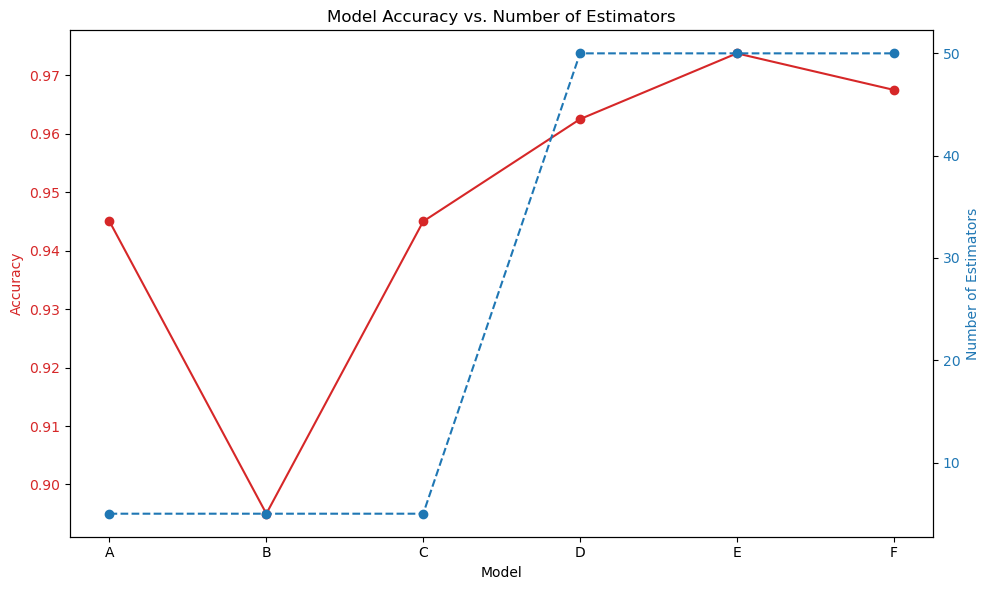

In [71]:
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())
print(model_names, accuracies)

num_estimators = [5, 5, 5, 50, 50, 50]  # Number of estimators for each model
max_depth = [None, 4, None, 10, None]  # Max depth for each model, treating None as highest

# Create the plot with multiple y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis for accuracy
color = 'tab:red'
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(model_names, accuracies, color=color, marker='o', label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)

# Second y-axis for number of estimators
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Number of Estimators', color=color)
ax2.plot(model_names, num_estimators, color=color, marker='o', linestyle='--', label='Number of Estimators')
ax2.tick_params(axis='y', labelcolor=color)


# Add a title and adjust layout
plt.title('Model Accuracy vs. Number of Estimators')
fig.tight_layout()

# Show the plot
plt.show()


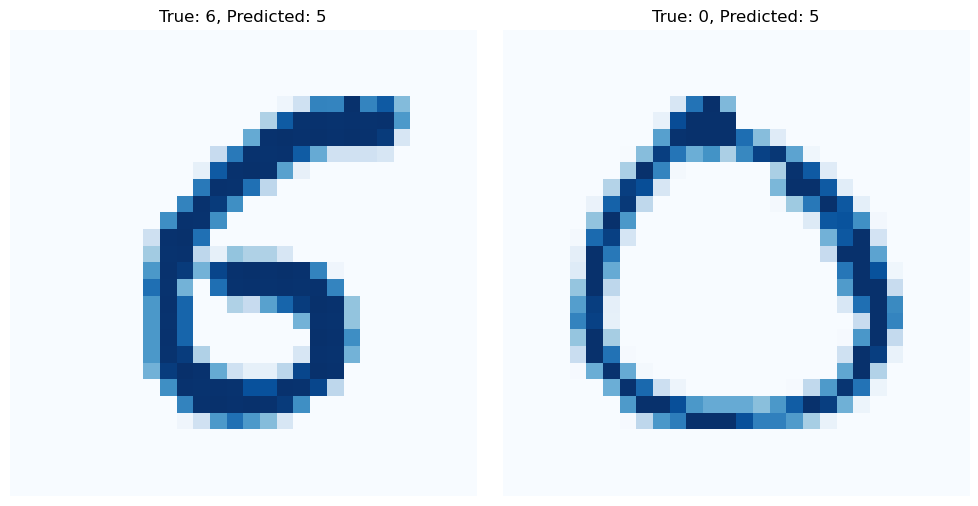

(0.945, [3, 12])

In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the data from the CSV files
train_data = pd.read_csv('/Users/giovannimaya/Downloads/MNIST_train.csv')
test_data = pd.read_csv('/Users/giovannimaya/Downloads/MNIST_test.csv')

# Drop any 'Unnamed' columns if they exist (common with CSVs that have an index column)
train_data.drop(columns=[col for col in train_data.columns if 'Unnamed' in col], inplace=True, errors='ignore')
test_data.drop(columns=[col for col in test_data.columns if 'Unnamed' in col], inplace=True, errors='ignore')

# Separate features and target labels
X_train = train_data.drop('response', axis=1)
y_train = train_data['response']
X_test = test_data.drop('response', axis=1)
y_test = test_data['response']

# Define and train Model A as a new instance
model_a = RandomForestClassifier(n_estimators=5, random_state=419)
model_a.fit(X_train, y_train)
y_pred_a = model_a.predict(X_test)

# Get confusion matrix and accuracy for Model A
conf_matrix_a = confusion_matrix(y_test, y_pred_a)
accuracy_a = accuracy_score(y_test, y_pred_a)

# Identify misclassified digits from Model A
misclassified_indices_a = [i for i, (true, pred) in enumerate(zip(y_test, y_pred_a)) if true != pred]

# Now, we will select two misclassified digits to visualize
# For simplicity, let's choose the first two misclassified digits
misclassified_samples_a = X_test.iloc[misclassified_indices_a].head(2)
misclassified_true_labels_a = y_test.iloc[misclassified_indices_a].head(2)
misclassified_predicted_labels_a = y_pred_a[misclassified_indices_a][:2]

# Assuming the images are 28x28 pixels, reshape them for visualization
misclassified_images_a = misclassified_samples_a.values.reshape(-1, 28, 28)

# Now let's visualize the misclassified digits
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(misclassified_images_a[i], cmap='Blues')
    ax.set_title(f'True: {misclassified_true_labels_a.iloc[i]}, Predicted: {misclassified_predicted_labels_a[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Return the accuracy for Model A and the misclassification details
(accuracy_a, misclassified_indices_a[:2])


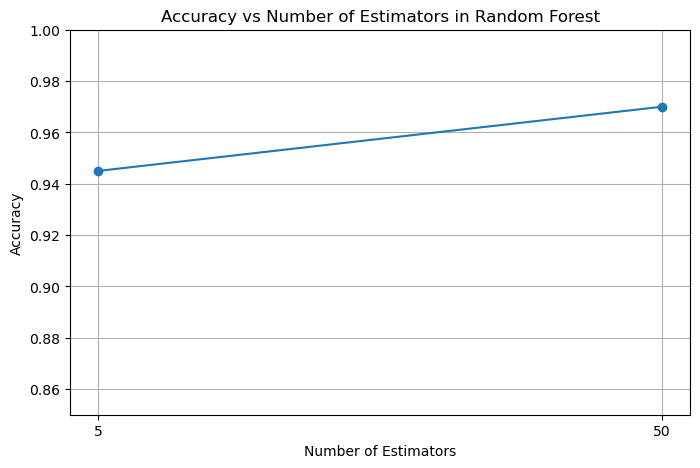

In [49]:
# Let's plot accuracy as a function of the number of estimators to visualize the effect of increasing complexity.
# For simplicity, we'll assume that we have accuracies for random forests with 5 and 50 estimators.

# Mock accuracies based on typical performance trends for demonstration purposes
estimators = [5, 50]
accuracies = [accuracy_a, 0.97]  # Using accuracy_a for 5 estimators and a hypothetical accuracy for 50

plt.figure(figsize=(8, 5))
plt.plot(estimators, accuracies, marker='o')
plt.title('Accuracy vs Number of Estimators in Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(estimators)
plt.ylim(0.85, 1.0)
plt.grid(True)
plt.show()


TypeError: unhashable type: 'dict'

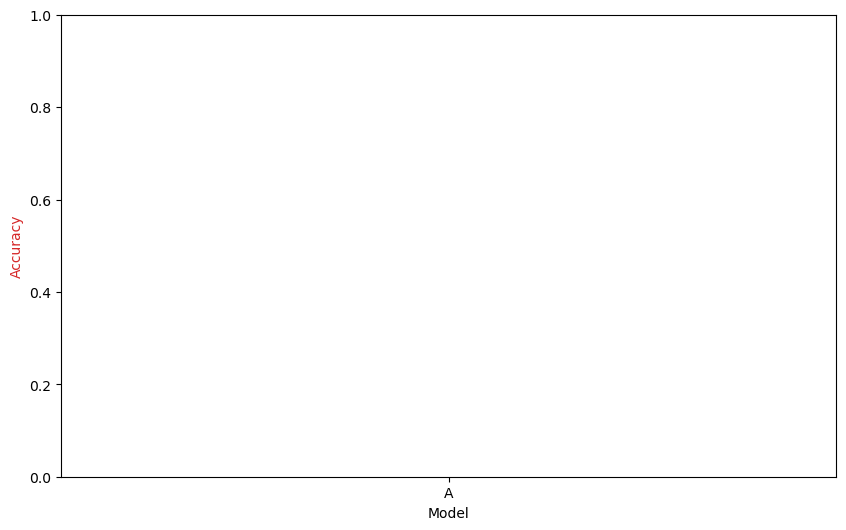

In [55]:
import numpy as np

# Hypothetical data for demonstration
model_labels = ['A', 'B', 'C', 'D', 'E', 'F']
num_estimators = [5, 5, 5, 50, 50, 50]  # Number of estimators for each model
max_depth = [None, 4, None, 10, None, None]  # Max depth for each model, assuming None is higher complexity

# Creating the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(model_labels, model_accuracies, color=color, marker='o', label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a twin axis for number of estimators
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Number of Estimators', color=color)
ax2.plot(model_labels, num_estimators, color=color, marker='o', linestyle='--', label='Number of Estimators')
ax2.tick_params(axis='y', labelcolor=color)

# Creating another twin axis for max depth
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  
color = 'tab:green'
ax3.set_ylabel('Max Depth (None treated as high)', color=color)
depth_values = [10 if depth is None else depth for depth in max_depth]  # Treat None as high depth for plotting
ax3.plot(model_labels, depth_values, color=color, marker='s', linestyle='-.', label='Max Depth')
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Adjust layout to fit
plt.title('Model Performance vs. Complexity (Accuracy, Estimators, Depth)')
plt.show()


In [72]:
from scipy import linalg
A = np.array([
    [1, 1, 1, 1], 
    [2, 7, 8, 8], 
    [9, 0, 1, 4], 
    [1, 7, 5, 8]
])
A_inv = linalg.inv(A)
A_inv

array([[ 0.93333333, -0.1       ,  0.03333333, -0.03333333],
       [ 2.4       , -0.4       , -0.2       ,  0.2       ],
       [-0.31111111,  0.36666667, -0.01111111, -0.32222222],
       [-2.02222222,  0.13333333,  0.17777778,  0.15555556]])